In [55]:
import numpy as np
import matplotlib.pyplot as plt

<h2> The objective function</h2>

In [56]:
def obj_fn(x, y):
    return (x - 3.14)**2 + (y - 2.72)**2 + np.sin(3*x + 1.41) + np.sin(4*y - 1.73)
    

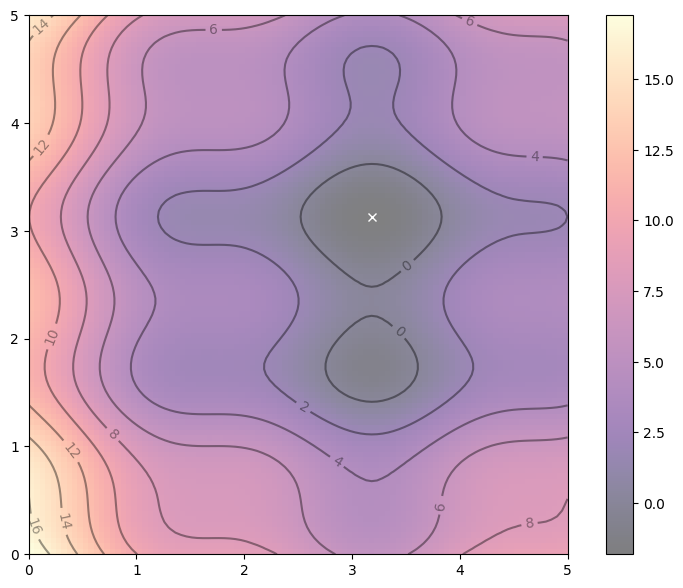

In [57]:
#plot the initial points on a meshgrid
x, y = np.array(np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100)))
z_val = obj_fn(x, y)
#x value where we have minima
x_min = x.ravel()[z_val.argmin()]
#y value where we have minima
y_min = y.ravel()[z_val.argmin()]
#plot a figure
plt.figure(figsize = (10, 7))
plt.imshow(z_val, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'magma', alpha = 0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker = 'x', markersize = 6, color = 'white')
contours = plt.contour(x, y, z_val, 10, colors = 'black', alpha = 0.4)
plt.clabel(contours, inline = True, fontsize = 10, fmt = "%.0f")
plt.show()

In [58]:
#create 20 random particles to solve this problem
n_particles = 20
#20 random particles
X = np.random.rand(2, n_particles)*5
print(X)
#20 random velocities
V = np.random.rand(2, n_particles)*0.1
print(V)


[[3.93670045 4.27243117 0.7394377  0.8233597  0.17337571 3.75538998
  1.89353102 0.65707042 2.7806403  1.60935615 4.41604252 3.17635676
  3.39472367 3.82458683 2.29985439 4.29011695 3.61981048 0.66875009
  4.51742218 0.43374846]
 [0.35335424 3.72465443 3.33745615 1.86853217 0.41676124 2.89821691
  1.79048328 1.85393754 3.08876144 2.14388248 0.69732533 3.87146177
  3.66791559 0.6366214  2.28593652 0.21870414 4.57312675 1.61493889
  4.29379931 4.50351014]]
[[0.0285905  0.06175904 0.03346475 0.02548586 0.04485743 0.02219825
  0.03315808 0.02974435 0.00171042 0.09644279 0.06543342 0.02047779
  0.05897831 0.07370728 0.09006284 0.04949411 0.02160581 0.07427435
  0.09958009 0.08037311]
 [0.0447076  0.01442272 0.05316157 0.02573581 0.01020753 0.05484604
  0.09549589 0.02792161 0.01035778 0.02111889 0.00222466 0.06314058
  0.09840231 0.06588187 0.06354344 0.00714096 0.09322363 0.01406833
  0.09979449 0.05819903]]


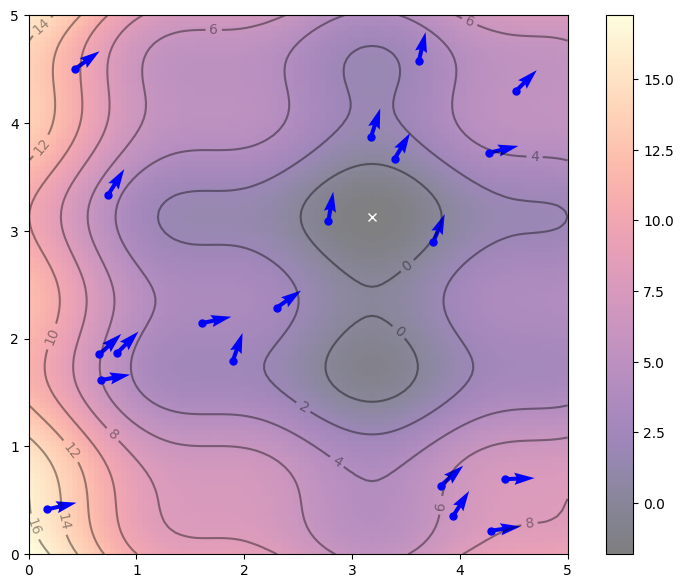

In [59]:
#plotting on contour
#plot the initial points on a meshgrid
x, y = np.array(np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100)))
z_val = obj_fn(x, y)
#x value where we have minima
x_min = x.ravel()[z_val.argmin()]
#y value where we have minima
y_min = y.ravel()[z_val.argmin()]
#plot a figure
plt.figure(figsize = (10, 7))
plt.imshow(z_val, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'magma', alpha = 0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker = 'x', markersize = 6, color = 'white')
contours = plt.contour(x, y, z_val, 10, colors = 'black', alpha = 0.4)
plt.clabel(contours, inline = True, fontsize = 10, fmt = "%.0f")
#plot the x values
plt.plot([X[0,:]], [X[1,:]], markersize = 10, marker = '.', color = 'blue')
#plot the vectors
for idx,ele in enumerate(X[0, :]):
    origin = [ele, X[1, :][idx]]
    plt.quiver(*origin, V[0, :][idx], V[1, :][idx], color = 'blue')
plt.show()

In [60]:
#since first iteration, none have explored yet
p_best = X
#so the best for each is the objective function at that point as of now
p_best_obj = obj_fn(X[0], X[1])
#global best is the minimum in pbest
#slice for all rows and get the x, y values with minimum
g_best = p_best[:, p_best_obj.argmin()]
g_best_obj = p_best_obj.min()

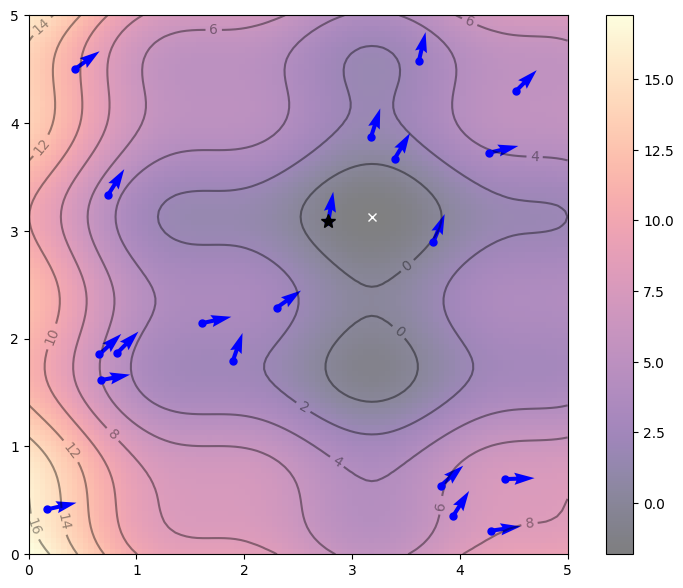

In [61]:
#plotting gbest
#plotting on contour
#plot the initial points on a meshgrid
x, y = np.array(np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100)))
z_val = obj_fn(x, y)
#x value where we have minima
x_min = x.ravel()[z_val.argmin()]
#y value where we have minima
y_min = y.ravel()[z_val.argmin()]
#plot a figure
plt.figure(figsize = (10, 7))
plt.imshow(z_val, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'magma', alpha = 0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker = 'x', markersize = 6, color = 'white')
contours = plt.contour(x, y, z_val, 10, colors = 'black', alpha = 0.4)
plt.clabel(contours, inline = True, fontsize = 10, fmt = "%.0f")
#plot the x values
plt.plot([X[0,:]], [X[1,:]], markersize = 10, marker = '.', color = 'blue')
#plot the vectors
for idx,ele in enumerate(X[0, :]):
    origin = [ele, X[1, :][idx]]
    plt.quiver(*origin, V[0, :][idx], V[1, :][idx], color = 'blue')

plt.plot([g_best[0]], [g_best[1]], marker = '*', color = 'black', markersize = 10)
plt.show()

In [62]:
#setting cognitive and social coefficients to 0.1
c1, c2 = 0.1, 0.1
w = 0.8

#first iteration
#set up the random numbers
r = np.random.rand(2)


#update the velocity
V = w*V + c1*r[0]*(p_best - X) + c2*r[1]*(g_best.reshape(-1, 1) - X)

#update the co-ordinates
X = X + V

#new objective
obj = obj_fn(X[0] ,X[1])
#update the p_best for each particle
p_best[:, (p_best_obj >= obj)] = X[: , (p_best_obj >= obj)]
#calculate p_best_obj
p_best_obj = np.array([p_best_obj, obj]).max(axis = 0)
#update g_best
g_best = p_best[:, p_best_obj.argmin()]
g_best_obj = p_best_obj.min()





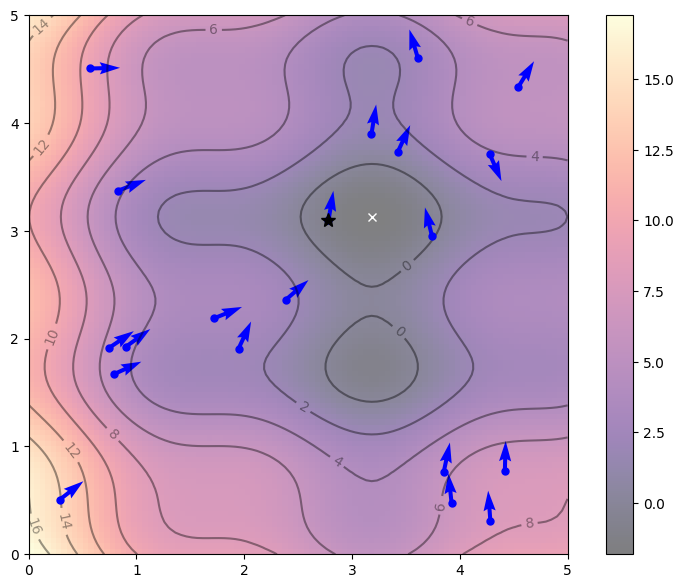

In [63]:
#plotting gbest
#plotting on contour
#plot the initial points on a meshgrid
x, y = np.array(np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100)))
z_val = obj_fn(x, y)
#x value where we have minima
x_min = x.ravel()[z_val.argmin()]
#y value where we have minima
y_min = y.ravel()[z_val.argmin()]
#plot a figure
plt.figure(figsize = (10, 7))
plt.imshow(z_val, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'magma', alpha = 0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker = 'x', markersize = 6, color = 'white')
contours = plt.contour(x, y, z_val, 10, colors = 'black', alpha = 0.4)
plt.clabel(contours, inline = True, fontsize = 10, fmt = "%.0f")
#plot the x values
plt.plot([X[0,:]], [X[1,:]], markersize = 10, marker = '.', color = 'blue')
#plot the vectors
for idx,ele in enumerate(X[0, :]):
    origin = [ele, X[1, :][idx]]
    plt.quiver(*origin, V[0, :][idx], V[1, :][idx], color = 'blue')

plt.plot([g_best[0]], [g_best[1]], marker = '*', color = 'black', markersize = 10)
plt.show()

In [64]:
#iteration function
def iterate(X, V, p_best, p_best_obj, g_best, g_best_obj, n):

    for _ in range(n):
        #setting cognitive and social coefficients to 0.1
        c1, c2 = 0.1, 0.1
        w = 0.8
        
        #first iteration
        #set up the random numbers
        r = np.random.rand(2)
        
        
        #update the velocity
        V = w*V + c1*r[0]*(p_best - X) + c2*r[1]*(g_best.reshape(-1, 1) - X)
        
        #update the co-ordinates
        X = X + V
        
        #new objective
        obj = obj_fn(X[0] ,X[1])
        #update the p_best for each particle
        p_best[:, (p_best_obj >= obj)] = X[: , (p_best_obj >= obj)]
        #calculate p_best_obj
        p_best_obj = np.array([p_best_obj, obj]).max(axis = 0)
        #update g_best
        g_best = p_best[:, p_best_obj.argmin()]
        g_best_obj = p_best_obj.min()

    
    return [X, V, p_best, p_best_obj, g_best, g_best_obj]
    





In [65]:
X, V, p_best, p_best_obj, g_best, g_best_obj = iterate(X, V, p_best, p_best_obj, g_best, g_best_obj, 5)



<h2> Plot after 5 iterations</h2>

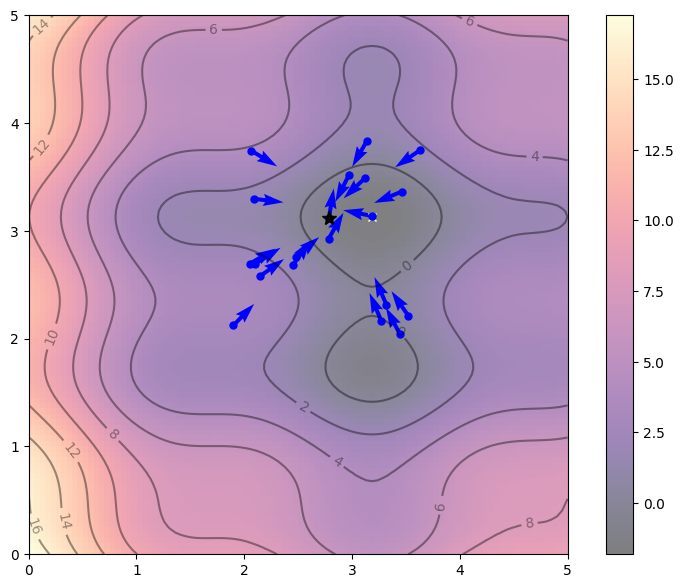

In [66]:
#plotting gbest
#plotting on contour
#plot the initial points on a meshgrid
x, y = np.array(np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100)))
z_val = obj_fn(x, y)
#x value where we have minima
x_min = x.ravel()[z_val.argmin()]
#y value where we have minima
y_min = y.ravel()[z_val.argmin()]
#plot a figure
plt.figure(figsize = (10, 7))
plt.imshow(z_val, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'magma', alpha = 0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker = 'x', markersize = 6, color = 'white')
contours = plt.contour(x, y, z_val, 10, colors = 'black', alpha = 0.4)
plt.clabel(contours, inline = True, fontsize = 10, fmt = "%.0f")
#plot the x values
plt.plot([X[0,:]], [X[1,:]], markersize = 10, marker = '.', color = 'blue')
#plot the vectors
for idx,ele in enumerate(X[0, :]):
    origin = [ele, X[1, :][idx]]
    plt.quiver(*origin, V[0, :][idx], V[1, :][idx], color = 'blue')

plt.plot([g_best[0]], [g_best[1]], marker = '*', color = 'black', markersize = 10)
plt.show()